# Diabetes Dataset

In [405]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from mlxtend import evaluate
from mlxtend import plotting

from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA


In [406]:
# Loading the Diabetes Dataset and check if it is continuous or discrete and also check if it has null objects in it.

base_df = pd.read_csv("C:\\Users\\Vijayaraghavan\\Downloads\\DataSceince_Exercise\\DataSets\\diabetescsv\\diabetes.csv")
base_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,132,0,0,0,32.9,0.302,23,1
1,1,89,66,23,94,28.1,0.167,21,0
2,0,119,0,0,0,32.4,0.141,24,1
3,1,73,50,10,0,23.0,0.248,21,0
4,0,138,0,0,0,36.3,0.933,25,1
5,2,84,0,0,0,0.0,0.304,21,0
6,0,131,0,0,0,43.2,0.270,26,1
7,1,80,55,0,0,19.1,0.258,21,0
8,3,141,0,0,0,30.0,0.761,27,1
9,2,146,0,0,0,27.5,0.240,28,1


In [407]:
base_df.shape

(768, 9)

In [408]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### a) The Dataset has not categorical features present and also All the features are continuous data as there is no predefined values as discrete Data. There are 8 dependent variables and 1 independent variable(target). it is classified as 0s and 1s. Based on the dataset analysis, 0s represents the non-Diabetes and 1st represent the diabetes. There are 768 records available in the dataset.

In [409]:
base_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [410]:
base_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [411]:
base_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data PreProcessing

In [413]:
base_df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [255]:
print(base_df[base_df.Pregnancies == 0].groupby('Outcome')['Pregnancies'].count())
print(base_df[base_df.Glucose == 0].groupby('Outcome')['Glucose'].count())
print(base_df[base_df.BloodPressure == 0].groupby('Outcome')['BloodPressure'].count())
print(base_df[base_df.SkinThickness == 0].groupby('Outcome')['SkinThickness'].count())
print(base_df[base_df.Insulin == 0].groupby('Outcome')['Insulin'].count())
print(base_df[base_df.BMI == 0].groupby('Outcome')['BMI'].count())

Outcome
0    73
1    38
Name: Pregnancies, dtype: int64
Outcome
0    3
1    2
Name: Glucose, dtype: int64
Outcome
0    19
1    16
Name: BloodPressure, dtype: int64
Outcome
0    139
1     88
Name: SkinThickness, dtype: int64
Outcome
0    236
1    138
Name: Insulin, dtype: int64
Outcome
0    9
1    2
Name: BMI, dtype: int64


###### There are zeroes in most of the features like Glucose, BloodPressure, Insuling, SikcThickness. 35  zeroes for BloodPressure, 5 for Glucose, 227 for SkinThickness, 327 for Insulin. Blood Pressure and Glucose cannot be zero unless the person is dead.



##### In the Preprocessing, we can remove the zeroes records where the BloodPressure, BMI and Glucose are zero. We can not remove the records of insulin and Skin Thickness as the recors are more. Its seems to be dataset is incomplete. we can do minor adjustments on the above three features

In [414]:
mod_df = base_df[(base_df.BloodPressure != 0) & (base_df.BMI != 0) & (base_df.Glucose != 0)]

In [415]:
mod_df.isin([0]).sum()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

In [416]:
features= mod_df.drop(columns= 'Outcome')

In [417]:
target = mod_df.Outcome

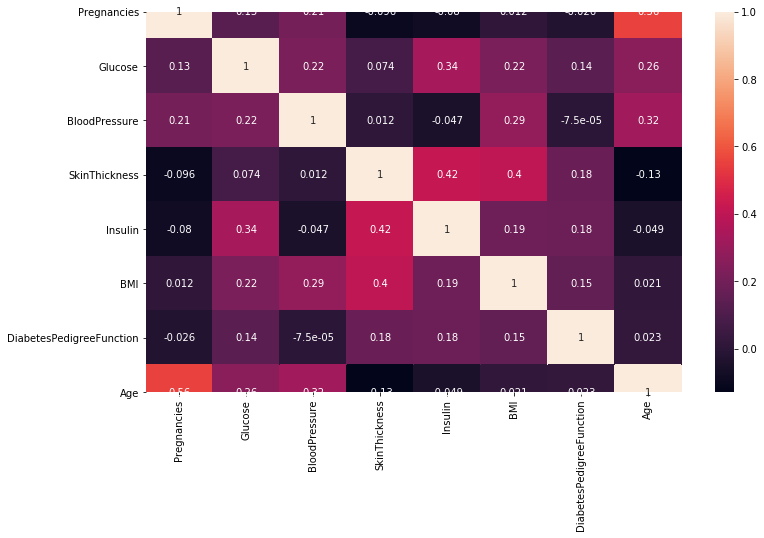

In [418]:
plt.figure(figsize= (12,7))
sns.heatmap(features.corr() , annot= True)
plt.show()

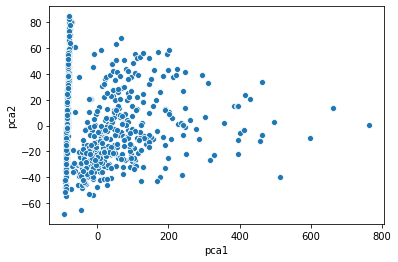

In [419]:
reduced_data = PCA(n_components=2).fit_transform(features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results)
plt.show()

<Figure size 432x288 with 0 Axes>

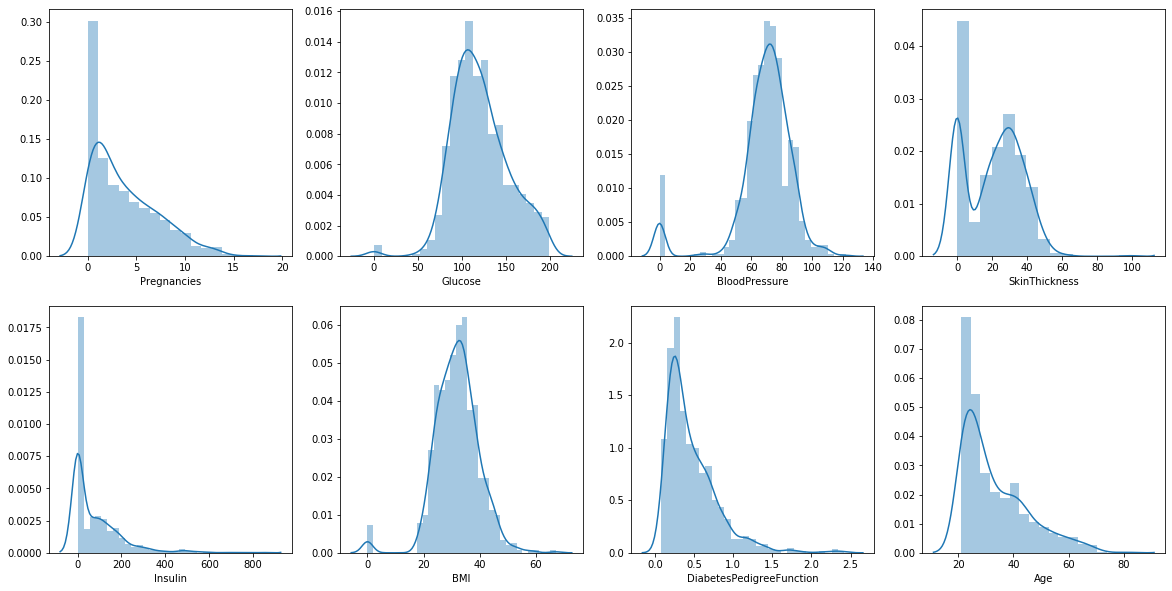

In [420]:
plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(features.columns, ax.flatten()):
    sns.distplot(df[var], ax=subplot)

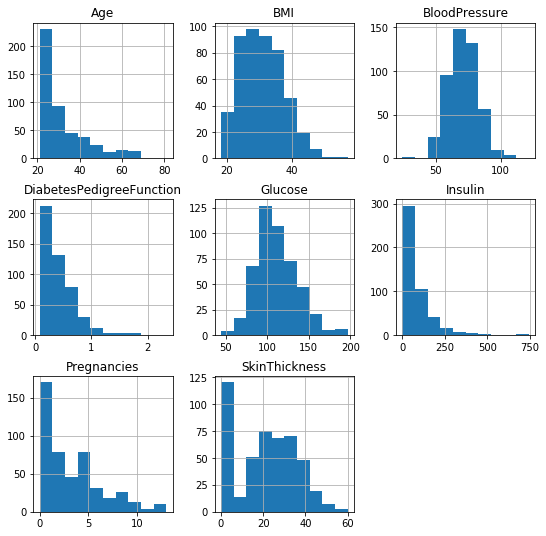

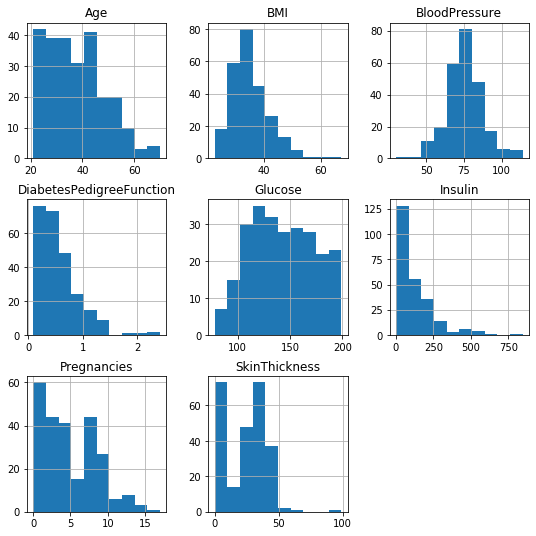

In [421]:
mod_df.groupby('Outcome').hist(figsize=(9, 9))
plt.show()

<Figure size 432x288 with 0 Axes>

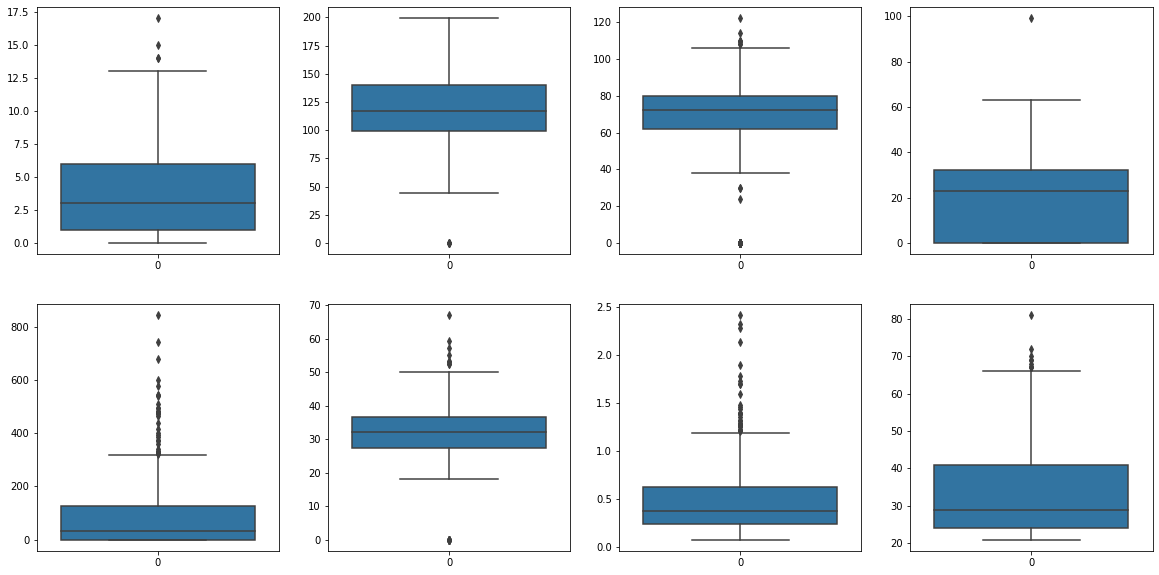

In [422]:
plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(base_df.columns, ax.flatten()):
    sns.boxplot(data=base_df[var],ax=subplot)

###### Based on the above Data Exploration, Features does not have much Correlation between each other. There are some outliers for some of the columns like Pregnancies, Blood Pressure,Insulin

##### Some of the the features are normall Distirbutes and some of the features are skewed. We will use the features scaling to normalize it.

# Feature Scaling

In [423]:
Scalar = StandardScaler()

In [424]:
features_scaled=Scalar.fit_transform(features)

In [425]:
features_Scaled_df= pd.DataFrame(features_scaled, columns = mod_df.drop(['Outcome'], axis=1).columns)

In [436]:
X_train,X_val,Y_train,Y_val=train_test_split(features_scaled,target)

In [520]:
from scipy import stats
stats.ttest_ind(features_scaled,X_train).pvalue

array([0.80382096, 0.45155535, 0.45508303, 0.87275577, 0.41708547,
       0.52144527, 0.75427165, 0.64538185])

The P-Value for most of the features are more that Critical value - 0.5.

# Base Model Selection

In [437]:
models = []

models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [438]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    scores.append(metrics.accuracy_score(Y_val, Y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  SVC  0.723757
1   LR  0.767956
2   DT  0.668508
3  GNB  0.751381
4   RF  0.756906


C:\Users\Vijayaraghavan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vijayaraghavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vijayaraghavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9aaf3b6c8>)

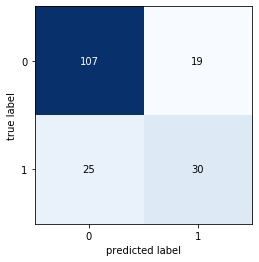

In [439]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_val , Y_pred))

In [440]:
print(metrics.classification_report(Y_val , Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       126
           1       0.61      0.55      0.58        55

    accuracy                           0.76       181
   macro avg       0.71      0.70      0.70       181
weighted avg       0.75      0.76      0.75       181



###### with the above base models,  Percentage for most of the models are 75% with the  Precision and recall  percentage for 1s are less. So we will do the Upsampling in order to balance the class.

## Upsampling

In [441]:
mod_df['Outcome'].value_counts()

0    475
1    249
Name: Outcome, dtype: int64

In [442]:
from sklearn.utils import resample

In [443]:
mod_df_majority = mod_df[mod_df.Outcome==0]
mod_df_minority = mod_df[mod_df.Outcome==1]

mod_df_minority_upsampled = resample(mod_df_minority, 
                                 replace=True,     
                                 n_samples=475,   
                                 random_state=123)

In [444]:
mod_df_upsampled = pd.concat([mod_df_majority, mod_df_minority_upsampled])

In [445]:
mod_df_upsampled['Outcome'].value_counts()

1    475
0    475
Name: Outcome, dtype: int64

In [446]:
features_upsampled=mod_df_upsampled.drop(columns='Outcome',axis=1)

In [447]:
target_upsampled=mod_df_upsampled['Outcome']

In [448]:
X_Train,X_Val,Y_Train,Y_Val=train_test_split(features_upsampled,target_upsampled)

### Logistic Regression with Upsampling class

In [449]:
LR_model = LogisticRegression()

In [450]:
LR_model.fit(X_Train,Y_Train)

C:\Users\Vijayaraghavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [451]:
Y_Pred=LR_model.predict(X_Val)

In [452]:
metrics.f1_score(Y_Val,Y_Pred)

0.7678571428571428

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9aa392388>)

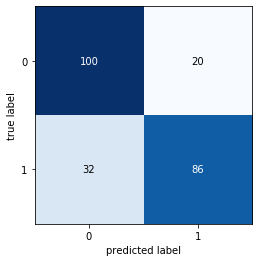

In [453]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_Val , Y_Pred))

In [454]:
print(metrics.classification_report(Y_Val , Y_Pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       120
           1       0.81      0.73      0.77       118

    accuracy                           0.78       238
   macro avg       0.78      0.78      0.78       238
weighted avg       0.78      0.78      0.78       238



Text(0.5, 0, 'False Positive Rate')

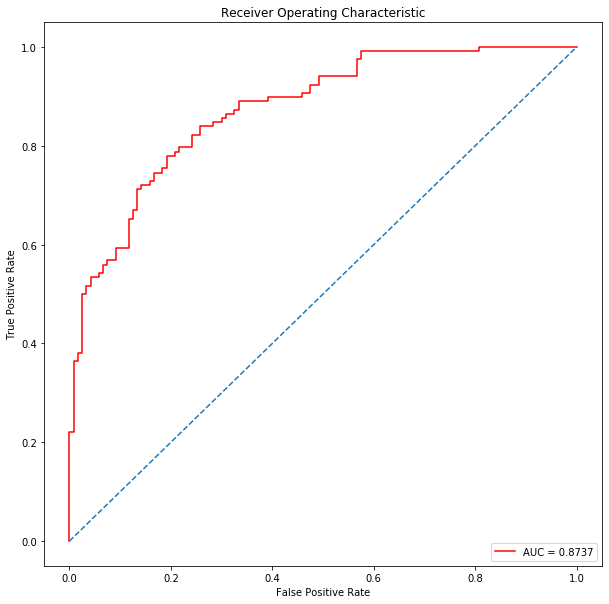

In [455]:
result_proba_LR = LR_model.predict_proba(X_Val)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Val, result_proba_LR)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## RandomForest with Upsampling Class

In [456]:
RF_model=RandomForestClassifier()

In [457]:
RF_model.fit(X_Train,Y_Train)

C:\Users\Vijayaraghavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [458]:
Y_Pred=RF_model.predict(X_Val)

In [459]:
metrics.f1_score(Y_Val,Y_Pred)

0.8823529411764707

In [460]:
metrics.accuracy_score(Y_Val,Y_Pred)

0.8823529411764706

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9aaee43c8>)

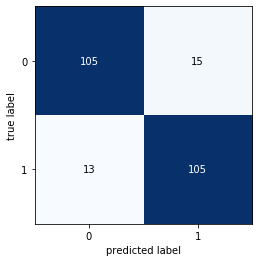

In [461]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_Val , Y_Pred))

In [462]:
print(metrics.classification_report(Y_Val , Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       120
           1       0.88      0.89      0.88       118

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



Text(0.5, 0, 'False Positive Rate')

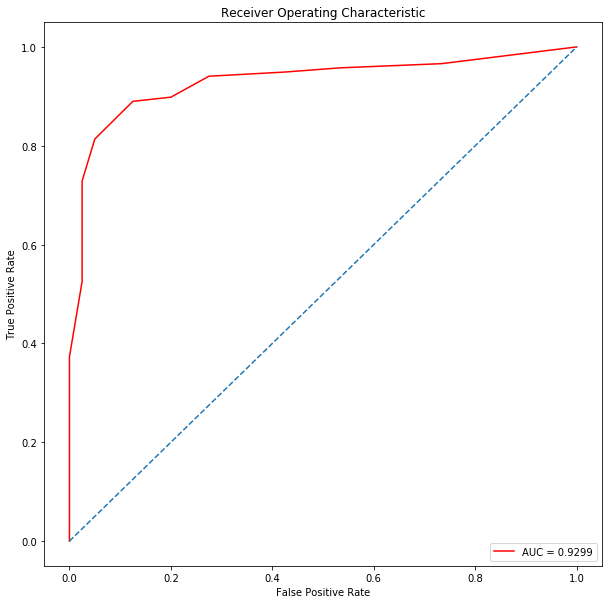

In [463]:
result_proba_RF = RF_model.predict_proba(X_Val)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Val, result_proba_RF)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## XGBoost with Upsampling

In [464]:
xgb_model = xgb.XGBClassifier()

In [465]:
xgb_model.fit(X_Train,Y_Train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [466]:
Y_Pred=xgb_model.predict(X_Val)

In [467]:
metrics.accuracy_score(Y_Val,Y_Pred)

0.9243697478991597

In [468]:
metrics.f1_score(Y_Val,Y_Pred)

0.925

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9a78e5a48>)

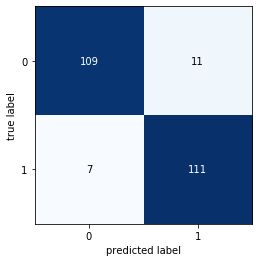

In [469]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_Val , Y_Pred))

In [470]:
print(metrics.classification_report(Y_Val , Y_Pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       120
           1       0.91      0.94      0.93       118

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



Text(0.5, 0, 'False Positive Rate')

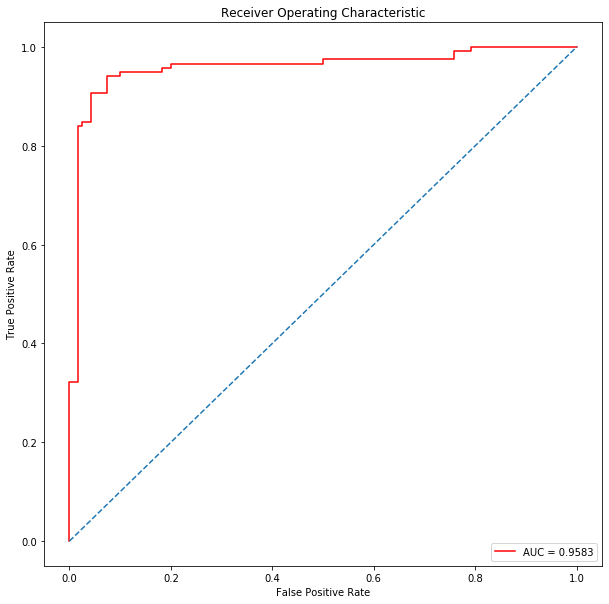

In [471]:
result_proba_xgb = xgb_model.predict_proba(X_Val)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Val, result_proba_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model Fine Tuning

### Random Forest

In [472]:
RF_Model_Fine = RandomForestClassifier()

In [473]:
param = { "n_estimators" : [25 , 20 , 30 , 35 , 40 , 45 , 50, 60, 70 ] , 
         "max_depth" : [5, 6, 7, 8, 10] , "criterion" : ['gini' , 'entropy']}

In [474]:
gd_model = GridSearchCV(estimator= RF_Model_Fine , param_grid= param  , n_jobs= -1 , cv= 3)

In [475]:
gd_model.fit(X_Train,Y_Train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [477]:
gd_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 35}

In [478]:
RF_Model_Fine2=RandomForestClassifier(n_estimators= 35 , max_depth= 10 , criterion='gini', random_state=123 )

In [479]:
RF_Model_Fine2.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [480]:
Y_Pred=RF_Model_Fine2.predict(X_Val)

In [481]:
metrics.accuracy_score(Y_Val,Y_Pred)

0.9033613445378151

In [482]:
metrics.f1_score(Y_Val,Y_Pred)

0.9037656903765691

### Logistic Regression

In [483]:
LR_Model_Fine=LogisticRegression()

In [484]:
c_values = [1,2,3,4,5,6,7,8,9,10]
param = [{ 'C': c_values,'penalty': ['l2'] , 'class_weight': ['balanced'],
         'solver' : ['liblinear'],'multi_class' : ['ovr']},
         { 'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}]

In [485]:
gr_model = GridSearchCV(estimator= LR_Model_Fine  , param_grid= param  , n_jobs= -1 , cv= 3)

In [486]:
gr_model.fit(X_Train,Y_Train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'class_weight': ['balanced'], 'multi_class': ['ovr'],
                          'penalty': ['l2'], 'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'multi_class': ['ovr'], 'penalty': ['l2'

In [487]:
gr_model.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [488]:
Lr_model_fine2=LogisticRegression(C=2.0, class_weight='balanced', multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=123, solver='liblinear')

In [489]:
Lr_model_fine2.fit(X_Train,Y_Train)

LogisticRegression(C=2.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [490]:
Y_Pred=Lr_model_fine2.predict(X_Val)

In [491]:
metrics.accuracy_score(Y_Val,Y_Pred)

0.7815126050420168

In [492]:
metrics.f1_score(Y_Val,Y_Pred)

0.7657657657657657

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9a6e6fa48>)

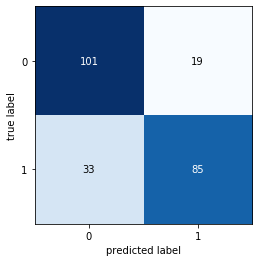

In [493]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_Val , Y_Pred))

In [495]:
print(metrics.classification_report(Y_Val , Y_Pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       120
           1       0.82      0.72      0.77       118

    accuracy                           0.78       238
   macro avg       0.79      0.78      0.78       238
weighted avg       0.79      0.78      0.78       238



Text(0.5, 0, 'False Positive Rate')

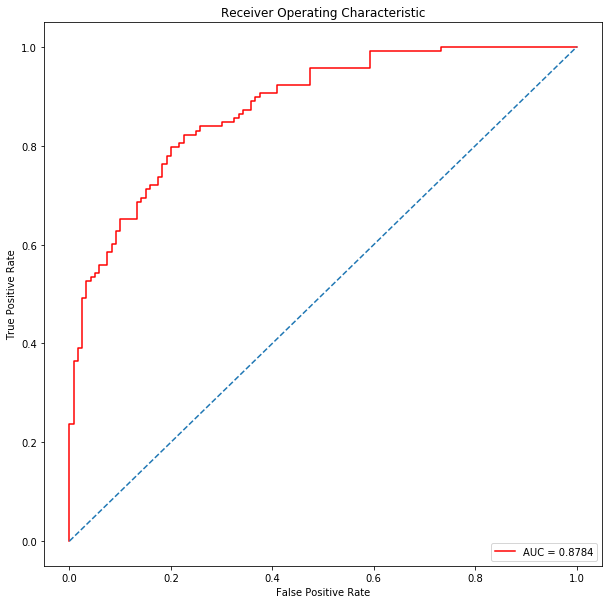

In [496]:
result_proba_Lr = Lr_model_fine2.predict_proba(X_Val)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Val, result_proba_Lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### XGBoost

In [497]:
param_dict = {'max_depth' : [5,6,7,8,9] , 'n_estimators' : [50 , 100 , 150 , 200]}

In [498]:
xgb_model_fine = xgb.XGBClassifier()

In [499]:
grid_model_xgb = GridSearchCV(param_grid= param_dict ,estimator= xgb_model_fine , cv= 3 , n_jobs= -1 )

In [500]:
grid_model_xgb.fit(X_Train , Y_Train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [501]:
grid_model_xgb.best_params_

{'max_depth': 8, 'n_estimators': 50}

In [502]:
xgb_model_fine2 = xgb.XGBClassifier(max_depth= 8 , n_estimators= 50 , random_state=123 , n_jobs= -1 )

In [503]:
xgb_model_fine2.fit(X_Train,Y_Train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [504]:
Y_Pred=xgb_model_fine2.predict(X_Val)

In [505]:
metrics.accuracy_score(Y_Val,Y_Pred)

0.9201680672268907

In [506]:
metrics.f1_score(Y_Val,Y_Pred)

0.9218106995884775

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9a5739348>)

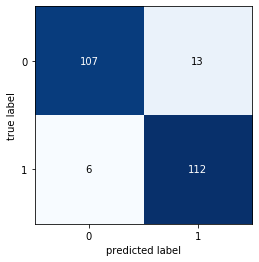

In [507]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_Val , Y_Pred))

In [508]:
print(metrics.classification_report(Y_Val , Y_Pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       120
           1       0.90      0.95      0.92       118

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



Text(0.5, 0, 'False Positive Rate')

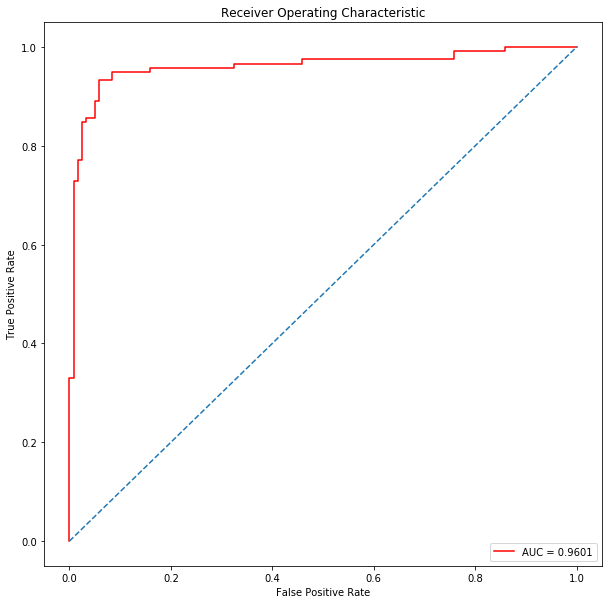

In [509]:
result_proba_xgb2 = xgb_model_fine2.predict_proba(X_Val)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Val, result_proba_xgb2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Feature Importance

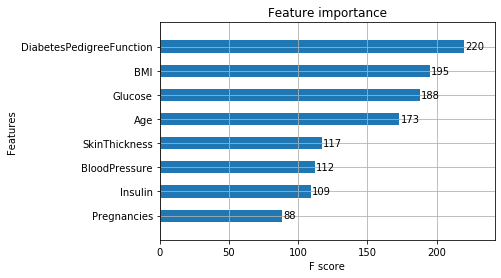

In [510]:
xgb.plot_importance(xgb_model_fine2 ,height= 0.5 , )

# Conclusion

1) Based on the above Model Analysis, Chossing the XGModel with high f1score and also the features are not correlated with each other.
The F1 Score for the models are
Model	     Base Model 	Upsampling	Model Tuning
Logistic	    75	         76	        76
RandomForest	76	         88	        90
Xgboost      	78	         92	        92


2) We can conclude that XGBoost is good model for this data with F1-Score: 92% and AUC : 96%. Since the F1-score and AUC are high, Overall Accuracy looks good.

3) Based on the dataset, It looks like Dataset is incomplete with wrong set of numbers for Blood Presssure, Glucose, BMI, Insuling and skinthickness, We had to minor adjustments in order to get the normalized data. Class of the data set is imbalance as Non-Diabetes - 66% and Diabetes - 34%, it  leads to imbalace data as it will predict one sided data. So we had to Upsampling the data to make is balanced data. when we calculate Prcesion and Recall, it is more or less equal after balancing the class data.

3) Based on the feature analyis,
 a) When the Age is between 20 to 30, Less number of Diabetes.
 b) When the Glucose is high, more number of diabletes. Directl proportionate
 c) Age is randomly distributed from 30 to 50 with more number of Diabetes
 d) When the DiabetesPredigreefunction reduces, increase in chance of diabetes.

4) Feature_Importance: DiabetedPedigreeFunction,BMI, Glucose and Age plays a vital role to identify the Diabetes.The above features are directly impacting the Outcome.